In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
# import iris dataset
iris = pd.read_csv("iris.csv")
iris.shape

(150, 5)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

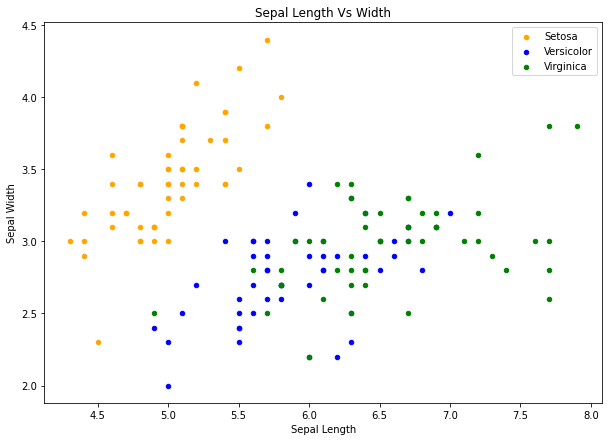

In [6]:
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='Setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


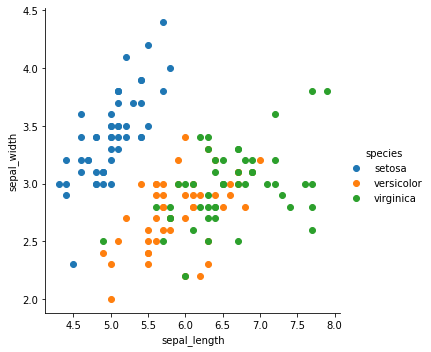

In [7]:
import seaborn as sns
sns.FacetGrid(iris, hue='species', size=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

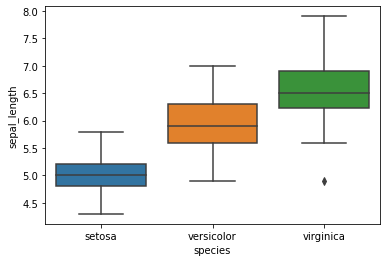

In [8]:
sns.boxplot(x="species", y="sepal_length", data=iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d9de4650>,
      dtype=object)

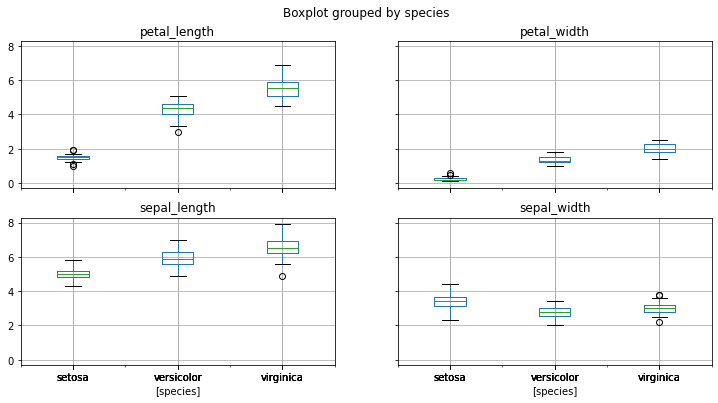

In [9]:
iris.boxplot(by="species", figsize=(12, 6))

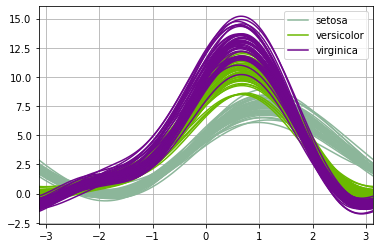

In [10]:
from pandas.plotting import andrews_curves

andrews_curves(iris,"species")

In [11]:
X = iris.drop(columns=['species'])
y = iris["species"]


In [12]:
# split into train and test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Create models
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC()

In [14]:
# Train  models
tree_clf.fit(x_train, y_train)
logreg.fit(x_train, y_train)
knn.fit(x_train, y_train)
svm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Predict the output for the test input set
y_predicted_tree = tree_clf.predict(x_test)
y_predicted_log = logreg.predict(x_test)
y_predicted_knn = knn.predict(x_test)
y_predicted_svm = knn.predict(x_test)

In [16]:
# Measure scores
print("Scores for Decision Tree Classifier :")
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted_tree))
print("Recall: %2f" % metrics.recall_score(y_test, y_predicted_tree, average="macro"))
print("Precision: %2f" % metrics.precision_score(y_test, y_predicted_tree, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_predicted_tree, average="macro"))

print("\nScores for Logistic Regression Classifier :")
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted_log))
print("Recall: %2f" % metrics.recall_score(y_test, y_predicted_log, average="macro"))
print("Precision: %2f" % metrics.precision_score(y_test, y_predicted_log, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_predicted_log, average="macro"))

print("\nScores for K-Nearest Neighbors :")
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted_knn))
print("Recall: %2f" % metrics.recall_score(y_test, y_predicted_knn, average="macro"))
print("Precision: %2f" % metrics.precision_score(y_test, y_predicted_knn, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_predicted_knn, average="macro"))

print("\nScores for SVM :")
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_predicted_svm))
print("Recall: %2f" % metrics.recall_score(y_test, y_predicted_svm, average="macro"))
print("Precision: %2f" % metrics.precision_score(y_test, y_predicted_svm, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_predicted_svm, average="macro"))

Scores for Decision Tree Classifier :
Accuracy: 0.894737
Recall: 0.868056
Precision: 0.896825
F1: 0.877451

Scores for Logistic Regression Classifier :
Accuracy: 0.973684
Recall: 0.979167
Precision: 0.966667
F1: 0.971703

Scores for K-Nearest Neighbors :
Accuracy: 0.973684
Recall: 0.979167
Precision: 0.966667
F1: 0.971703

Scores for SVM :
Accuracy: 0.973684
Recall: 0.979167
Precision: 0.966667
F1: 0.971703


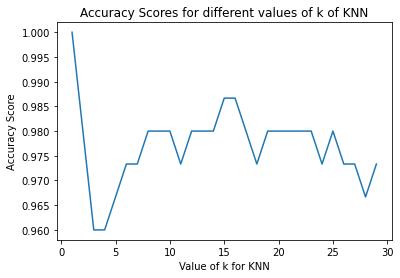

In [17]:
# experimenting with different n values
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_predicted = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_predicted))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k of KNN')
plt.show()